导入数据库

In [13]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import random
import torch

划分数据集

In [2]:
#创建数据，划分数据集，将划分好的数据集进行修改

#创建数据
x,y=datasets.make_regression(n_samples=1000,n_features=1,bias=20,random_state=0,noise=20)

#划分数据集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#进行一些修正（加上偏移项）
o_train=np.ones([x_train.shape[0],1],dtype=x_train.dtype)
o_test=np.ones([x_test.shape[0],1],dtype=x_test.dtype)
x_train=np.concatenate((o_train,x_train),axis=1)
x_test=np.concatenate((o_test,x_test),axis=1)

In [3]:
print(x_test)

[[ 1.         -0.1931767 ]
 [ 1.          0.02461213]
 [ 1.         -1.46642433]
 [ 1.         -1.29868672]
 [ 1.         -1.64296529]
 [ 1.          0.01927938]
 [ 1.         -0.62808756]
 [ 1.         -0.94436849]
 [ 1.         -0.5075176 ]
 [ 1.         -1.40596292]
 [ 1.          0.52004061]
 [ 1.          0.05892559]
 [ 1.          0.86565292]
 [ 1.         -1.33425847]
 [ 1.         -1.18388064]
 [ 1.         -1.37075998]
 [ 1.         -1.88458584]
 [ 1.          1.84926373]
 [ 1.          1.29782527]
 [ 1.         -1.0326431 ]
 [ 1.          0.93639854]
 [ 1.         -0.37024244]
 [ 1.          0.17879287]
 [ 1.          0.54331189]
 [ 1.         -0.49610233]
 [ 1.         -1.09306151]
 [ 1.         -0.36505522]
 [ 1.         -1.57062341]
 [ 1.         -1.76853845]
 [ 1.          1.76405235]
 [ 1.         -0.2226751 ]
 [ 1.          0.46566244]
 [ 1.          0.27117018]
 [ 1.         -0.04140081]
 [ 1.         -0.58126848]
 [ 1.         -2.24532165]
 [ 1.         -0.88897136]
 

画图

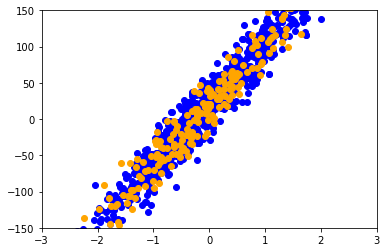

In [4]:
plt.scatter(x_train[:,1],y_train,c='blue')
plt.scatter(x_test[:,1],y_test,c='orange')
plt.xlim((-3,3))
plt.ylim((-150,150))
plt.show()

通过循环进行单独训练

[[  370.07176876 37007.17687602]]
[[19.6537982 ]
 [83.23351831]]


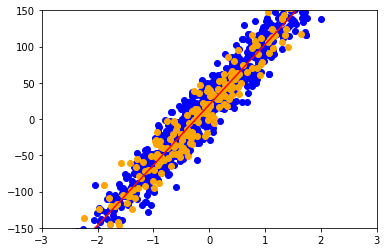

In [6]:
from re import A


THETA=np.zeros((2,1),dtype=float);
lr=0.02;
Epoch=2;


def hypothesis(THETA,x):
    return THETA.T.dot(x)

def update_para(THETA,h_x,y,lr,x):
    THETA=THETA-lr*(h_x-y)*x;
    return THETA


for epoch in range(Epoch):
    for x,y in zip(x_train,y_train):
        x=x.reshape((2,1))
        h_x=hypothesis(THETA,x);
        THETA=update_para(THETA,h_x,y,lr,x);

#用测试集进行测试
MSE=0;
for x,y in zip(x_test,y_test):
    x=x.reshape((2,1))
    h_x=hypothesis(THETA,x);
    MSE=MSE+(h_x-y)**2;
MSE=MSE/x_test.shape;
print(MSE)
print(THETA)
plt.scatter(x_train[:,1],y_train,c='blue')
plt.scatter(x_test[:,1],y_test,c='orange')
p_x=np.linspace(-2.5,2.5,70);
plt.plot(p_x,THETA[0,0]+THETA[1,0]*p_x,c='red')
plt.xlim((-3,3))
plt.ylim((-150,150))
plt.show()


批量随机下降

In [7]:
print(x_train)
print(x_train.T)

[[ 1.         -0.72559738]
 [ 1.          0.14195316]
 [ 1.          0.12898291]
 ...
 [ 1.          2.02104356]
 [ 1.          0.78495752]
 [ 1.         -1.46173269]]
[[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [-0.72559738  0.14195316  0.12898291 ...  2.02104356  0.78495752
  -1.46173269]]


In [45]:



def hypothesis1(THETA,x):
    return THETA.T.dot(x.T)

def update_para1(THETA,lr,x,y,h_x):
    THETA=THETA-lr*(h_x-y).dot(x).T
    return THETA

def update_lr(lr):
    if lr>0.05:
        return lr-0.02
    else: 
        return 0.99*lr;

def data_iter(batch_size,x,y):
    num=len(x)
    indices=list(range(num))
    random.shuffle(indices)
    for i in range(0,num,batch_size):
        batch_indices=torch.tensor(indices[i:min(i+batch_size,num)])
        yield x[batch_indices],y[batch_indices]

[[4.054284]]
[[21.85052671]]
[[-99.98697523]]
[[-86.28058274]]
[[-114.41271929]]
[[21.41477089]]
[[-31.48371536]]
[[-57.32807248]]
[[-21.63154679]]
[[-95.04647406]]
[[62.33362114]]
[[24.65439292]]
[[90.57474173]]
[[-89.18726758]]
[[-76.89939946]]
[[-92.16992634]]
[[-134.15633075]]
[[170.94882192]]
[[125.88896809]]
[[-64.54128184]]
[[96.35559953]]
[[-10.41434103]]
[[34.44914308]]
[[64.23519385]]
[[-20.69876765]]
[[-69.47826896]]
[[-9.99047585]]
[[-108.50142549]]
[[-124.67371576]]
[[163.98591906]]
[[1.64387261]]
[[57.89020128]]
[[41.99759821]]
[[16.45639211]]
[[-27.65797383]]
[[-163.63324197]]
[[-52.80139022]]
[[53.83620913]]
[[-11.81036174]]
[[-48.61004433]]
[[-8.75563663]]
[[-4.86276507]]
[[-41.23760685]]
[[32.64417725]]
[[3.07523107]]
[[-5.67904007]]
[[17.04133927]]
[[-45.78794047]]
[[-98.36172817]]
[[52.6872644]]
[[-60.14402446]]
[[-22.74870731]]
[[40.97996172]]
[[-106.06421254]]
[[-151.31753037]]
[[-62.43215141]]
[[94.21310671]]
[[60.19241916]]
[[27.51661682]]
[[40.47172029]]
[[-95.

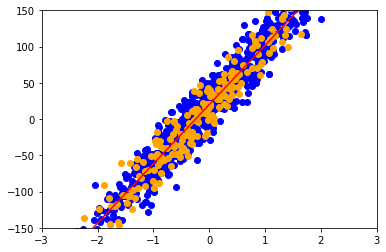

In [51]:

#未处理：lr的更新

EPOCH=3;
THETA=np.zeros((2,1),dtype=float)
batch=10;
'''for epoch in range(EPOCH):
    for k in range(x_train.shape[0]-batch):
        h_x=hypothesis1(THETA,x_train[k:batch+k,:]);
        THETA=update_para1(THETA,lr,x_train[k:batch+k,:],y_train[k:batch+k],h_x);
        lr=update_lr(lr);
        
        '''
for epoch in range(EPOCH):
    lr=0.03;
    for x,y in data_iter(batch,x_train,y_train):
        h_x=hypothesis1(THETA,x)
        THETA=update_para1(THETA,lr,x,y,h_x)
        lr=update_lr(lr)

    
#用测试集进行测试
MSE=0;
for x,y in zip(x_test,y_test):
    x=x.reshape((2,1))
    h_x=hypothesis(THETA,x);
    MSE=MSE+(h_x-y)**2;
    print(h_x)
MSE=MSE/x_test.shape;
print(MSE)
print(THETA)
plt.scatter(x_train[:,1],y_train,c='blue')
plt.scatter(x_test[:,1],y_test,c='orange')
p_x=np.linspace(-2.5,2.5,70);
plt.plot(p_x,THETA[0,0]+THETA[1,0]*p_x,c='red')
plt.xlim((-3,3))
plt.ylim((-150,150))
plt.show()


In [11]:

for x in np.nditer(x_test,order='C'):
    print(x)

1.0
-0.1931767015498399
1.0
0.024612125247911617
1.0
-1.466424327802514
1.0
-1.2986867221630902
1.0
-1.6429652935306092
1.0
0.019279384513077216
1.0
-0.6280875596415789
1.0
-0.9443684908242939
1.0
-0.507517601657357
1.0
-1.4059629162678993
1.0
0.5200406145708678
1.0
0.05892558918162996
1.0
0.8656529228158533
1.0
-1.3342584714027534
1.0
-1.1838806401933177
1.0
-1.3707599825430605
1.0
-1.8845858449794477
1.0
1.8492637284793418
1.0
1.2978252669735855
1.0
-1.0326431018921296
1.0
0.9363985435524596
1.0
-0.3702424407043429
1.0
0.17879286573317985
1.0
0.5433118913875197
1.0
-0.49610233398256237
1.0
-1.0930615087305058
1.0
-0.36505521654625767
1.0
-1.5706234086334527
1.0
-1.7685384506770307
1.0
1.764052345967664
1.0
-0.2226751005151545
1.0
0.46566243973045984
1.0
0.2711701846373109
1.0
-0.04140081155796743
1.0
-0.5812684768603252
1.0
-2.245321648371402
1.0
-0.8889713580954499
1.0
0.4160500462614255
1.0
-0.3873268174079523
1.0
-0.8376780419079453
1.0
-0.34994336458910474
1.0
-0.3023027505753355